# DATA AUGMENTATION

In [1]:
# Importamos librerías
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Esta función está obsoleta (aunque sigue funcionando)
import matplotlib.pyplot as plt
from skimage import io

In [7]:
# Definimos los parámetros para generar nuevos datos (Data augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [60]:
# Cargamos la imagen original
img = io.imread('./img/logo.jpeg')

- Dimensiones de la imagen:
(225, 225, 3)


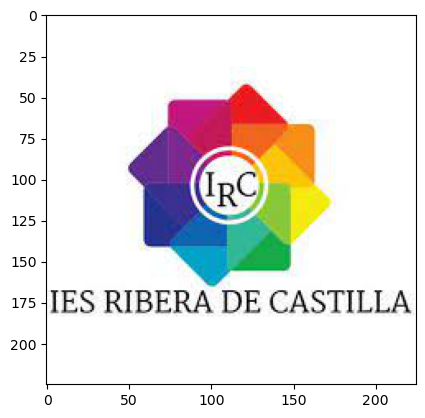

In [61]:
# Mostramos la imagen original y su tamaño
plt.imshow(img/255)
print("- Dimensiones de la imagen:")
print(img.shape)

In [62]:
# Redimensionamos la imagen a un tensor 4D con la forma (1, altura, anchura, canales)
img = img.reshape((1,) + img.shape)
print("- Dimensiones del tensor 4D:")
print(img.shape)

- Dimensiones del tensor 4D:
(1, 225, 225, 3)


El bloque de código anterior está redimensionando la imagen original a un tensor 4D con la forma (1, altura, anchura, canales). Esto se hace comúnmente en procesos de Data Augmentation por varias razones:

1. **Consistencia en el formato de entrada**: Muchos modelos de redes neuronales, especialmente los modelos de redes convolucionales (CNN), esperan un tensor de entrada de 4 dimensiones. Al redimensionar todas las imágenes a este formato, se garantiza que todas las entradas tengan la misma estructura, lo que facilita el manejo y procesamiento de los datos.

2. **Batch Processing**: Al redimensionar las imágenes a un tensor de 4 dimensiones, se pueden procesar en lotes (batches) más fácilmente. Esto es útil para la eficiencia computacional, ya que muchas librerías de aprendizaje profundo están optimizadas para el procesamiento en paralelo de lotes de datos.

3. **Compatibilidad con la librería de deep learning**: Muchas librerías de deep learning, como TensorFlow y Keras, esperan datos de entrada en forma de tensores 4D. Al redimensionar las imágenes a este formato, nos aseguramos de que sean compatibles con estas librerías y se puedan utilizar las funciones de Data Augmentation proporcionadas por ellas.

En resumen, redimensionar las imágenes a un tensor de 4 dimensiones es una práctica común en el procesamiento de imágenes para deep learning, ya que facilita el manejo de los datos y garantiza la compatibilidad con las librerías y modelos de deep learning.

In [56]:
# Generamos los nuevos datos "sintéticos" - Data Augmentation
augmented_images = []
for batch in datagen.flow(img, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 5:
        break  # Paramos el bucle después de generar 5 nuevas imágenes


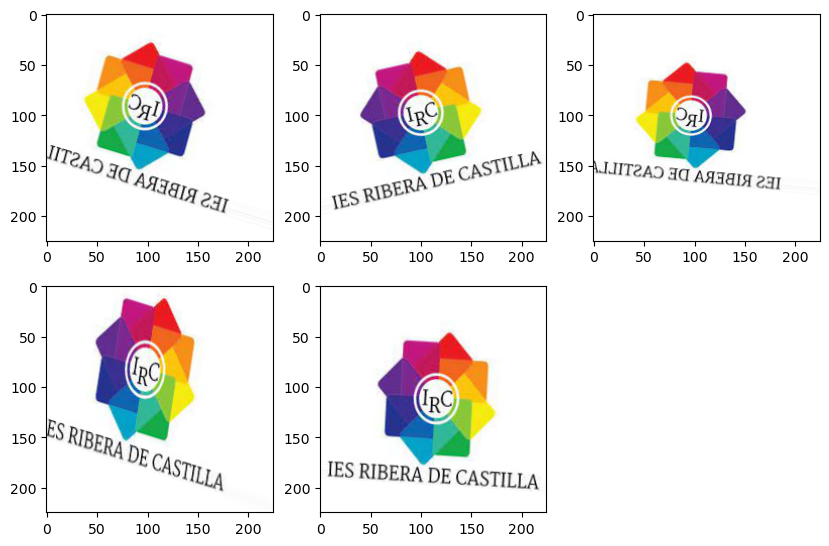

In [59]:
# Mostramos las nuevas imágenes
plt.figure(figsize=(10, 10))
for i, imgs in enumerate(augmented_images):
    plt.subplot(3, 3, i+1)
    plt.imshow(imgs/255)
#    plt.axis('off')
plt.show()

# Batch Normalization

Tenemos bastante claro el por que de la necesidad de la normalización. Sin embargo, normalizar todo el conjunto de datos de antemano puede ser problemático. Además, puede llegar a dificultar el entrenamiento de nuestro modelo y ralentiza la velocidad de aprendizaje.

La normalización por lotes (Batch Normalization) es un tipo de normalización que se aplica entre las capas de la red neuronal. No se utilizan todos los datos de entrada. En su lugar, se realiza en mini-lotes a lo largo de la red neuronal.

Podemos añadir capas de batch normalization entre las capas de nuestra red neuronal utilizando las librerías existentes. El objetivo principal de la normalización por lotes es estandarizar la entrada para que su media sea cero con una desviación estándar de uno. 

### ¿Cómo actúa el proceso de Batch Normalization?

Como acabamos de mencionar, este proceso pretende convertir los datos de tal forma que su media sea cero con una varianza de uno. Así, la salida de una capa se normaliza antes de introducirla en la capa siguiente.  


<img src="./img/batchNorm.png"> 


Como se muestra en la imagen anterior, esta técnica se utiliza para normalizar la salida de cada capa.

### Batch Normalization con Keras

La normalización por lotes puede aplicarse en nuestra red neuronal utilizando la capa **BatchNormalization**.   


Esta capa puede aplicarse antes o después de la función de activación de la capa anterior, aunque se aconseja aplicar la normalización por lotes antes de la capa de activación. Por ejemplo:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(100, 100, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
])

Sin embargo, la normalización por lotes a veces puede dar un mejor resultado si se utiliza después de la capa de activación. Por ejemplo:

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
])

Es aconsejable entrenar la red neuronal utilizando las diferentes ubicación de la capa de normalización por lotes y utilizar la que arroje mejor resultado.
El siguiente es un ejemplo en el que se sitúan las capas de normalización por lotes entre las capas de una red neuronal convolucional.

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import InputLayer
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

model = Sequential()

model.add(InputLayer(shape=(48,48,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

### Ventajas del uso de Batch Normalization

- Reduce el tiempo de entrenamiento de nuestro modelo.
- Se reduce la variación de la covarianza interna.
- Provoca que el ajuste de hiperparámetros sea menos necesario.
- Se pueden utilizar tasas de aprendizaje más altas para entrenar nuestro modelo.
- También regulariza el modelo en cierta medida y, por tanto, se minimiza la necesidad de otras técnicas de regularización.

Nota: también es posible usar esta capa de normalización como capa inicial justo después de la InputLayer.

Por último, recordar que podemos entrenar nuestro modelo sin normalización por lotes o incluso sin normalización. Sin embargo, se **recomienda utilizar la normalización** tal y como se ha comentado.